In [ ]:
import torch
from torch import nn, optim # Sets of preset layers and optimizers
import torch.nn.functional as F # Sets of functions such as ReLU
import torchvision as tv
# Step 1: Let's import some libraries!
import torch.nn as nn
import torchvision
import numpy as np
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random
from tqdm import tqdm
from torchvision import datasets, transforms # Popular datasets, architectures and common image transformations for computer vision

In [ ]:
def load_mnist(batch_size=32, train=True):

    '''
    Using the dataset and dataloader classes you should be able to make an MNIST set and loader
    the loader should use the 'batch_size' argument and the dataset should use'train'

    Also, the 'ToTensor' transform is given, you should set the transform of the dataset to just this
    '''
    to_tensor_transform = torchvision.transforms.ToTensor()
    dataset = torchvision.datasets.MNIST(root = "./data", train = train,transform = to_tensor_transform,download = True )
    dataloader = DataLoader(dataset,batch_size = batch_size, shuffle = True)

    return dataset, dataloader

In [ ]:
def plot_image_and_label(image, raw_output_from_model):

    '''
    Takes in an image and label and shows them using matplotlib
    this is used to visualize the data and also the outputs of our network
    '''

    plt.imshow(image)
    if type(raw_output_from_model) is not int:
        _,predicted = torch.max(raw_output_from_model,1)
#         Takes 1 highest number from the output
        plt.title("Best label = " + str(predicted.item()) + ", with Score: " + str(round(raw_output_from_model[0][predicted].item() * 100,2)))
    else:
        plt.title("Label = " + str(raw_output_from_model))
    plt.show()
    return

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([1, 28, 28]) ex_image.shape


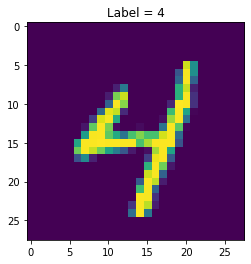

In [ ]:
# This will just test whether your dataset and loader work
# They might still have issues, but if an example image shows here you're on the right track!
train_data,train_dataloader = load_mnist(batch_size = 64, train = True)
to_tensor_transform = torchvision.transforms.ToTensor()
validate_data = datasets.MNIST(root= "./data", train=True,
                download=True, transform= to_tensor_transform)
ex_image, ex_label = train_data[random.randint(0,1000)]
print(ex_image.shape,'ex_image.shape')
plot_image_and_label(ex_image.reshape(28,28), ex_label)
# random.shuffle(train_data)


In [ ]:
class MyMLP(nn.Module):
    def __init__(self,input_size, output_size):
        super().__init__()
        self.input_size = input_size # making the input size accessible
        # Output Size = ((ModelSize - kernel_size + 2* padding) / stride)  + 1
#         Input given to the model  : (1, 28, 28) and  output : (40,28,28)
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 4 ,kernel_size = 6,stride = 2,padding = 1)
        # Output_size after self.conv1:  ((28 - 6 + 2)/ 2 ) + 1 = 13
#       Pooling layer will affect the size of an image
        # 784 * 40 with kernel size = 6, stride = 1 => output of image :
        self.conv2 = nn.Conv2d(in_channels = 4, out_channels = 2,kernel_size = 5,stride = 2,padding = 4 )
        # Model Size:   40 ,13, 13
        # Expected Output Size after self.conv2 :  (13-5+8)/2 + 1 = 9
        self.relu = nn.ReLU()       # you only need to define one relu, you can use this one
        # cnn_out_size = 2 * 9 * 9
        cnn_out_size =  162

        self.lin1 = nn.Linear(cnn_out_size,100)
        self.lin2 = nn.Linear(100,50)
        self.lin3 = nn.Linear(50,25)
        self.lin4 = nn.Linear(25,10)
        self.lin5 = nn.Linear(10,output_size)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = x.view(-1,1,28,28)

        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.relu(out)

        self.filtered = out  ## Saving the output from the convolutions so that we can see them
        out = out.flatten(start_dim = 1) # This is the flattening that we keep talking about (note that it will still be a batch on outputs)

        out = self.lin1(out)
        out = self.relu(out)
        out = self.lin2(out)
        out = self.relu(out)
        out = self.lin3(out)
        out = self.relu(out)
        out = self.lin4(out)
        out = self.relu(out)
        out = self.lin5(out)


        return out

In [ ]:
# # Shows the prediction of the model without training
# # Not very good huh? (though theres a small chance it is lol)

# test_model = MyMLP(784, 2)
# test_output = test_model(ex_image.flatten()) # Notice how we flatten the 2d image into 1d to use the MLP
# print(ex_image.shape,"eximage.shape")
# plot_image_and_label(ex_image.reshape(28,28), test_output)

In [ ]:
bits = []
def generateAllBinaryStrings(n, arr, i,num):
    if i == n:
        key = ''.join([str(i) for i in arr])
        bits.append(key)
        num += 1
        return

    # First assign "0" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1,num+1)

    # And then assign "1" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1,num+1)
num = 0
generateAllBinaryStrings(4,[0]*4 , 0,num)


In [ ]:
print(bits)
mapping = {}
curr_index = 0
invMapping = {}
for index,bit in enumerate(bits):
    mapping[index] = bit
    invMapping[bit] = index
print(mapping)
# Unbalanced : ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
# {0: '1111', 1: '0001', 2: '0010', 3: '0011', 4: '0100', 5: '0101', 6: '0110', 7: '0111', 8: '1000', 9: '1001'}
# Balanced :

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
{0: '0000', 1: '0001', 2: '0010', 3: '0011', 4: '0100', 5: '0101', 6: '0110', 7: '0111', 8: '1000', 9: '1001', 10: '1010', 11: '1011', 12: '1100', 13: '1101', 14: '1110', 15: '1111'}


In [ ]:
def training(modelname,model, loss_function, optimizer, train_dataloader, n_epochs, update_interval):

    '''
    Updates the parameters of the given model using the optimizer of choice to
    reduce the given loss_function

    This will iterate over the dataloader 'n_epochs' times training on each batch of images

    To get the gradient (which is stored internally in the model) use .backward() from the loss tensor
    and to apply it use .step() on the optimizer

    In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this
    '''

    losses = []
    part_loss = []
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):

            # TODO Complete the training loop using the instructions above
            # Hint: the above code essentially does one training step

            ##############################################################
            optimizer.zero_grad()
            my_output = model(image)
            if modelname == 'model1':
                new_label = torch.Tensor([int(mapping[int(l)][0]) for l in label]).long()
            elif modelname == 'model2':
                new_label = torch.Tensor([int(mapping[int(l)][1]) for l in label]).long()
            elif modelname == 'model3':
                new_label = torch.Tensor([int(mapping[int(l)][2]) for l in label]).long()
            elif modelname == 'model4':
                new_label = torch.Tensor([int(mapping[int(l)][3]) for l in label]).long()
            elif modelname == 'model':
                new_label = label
            loss = loss_function(my_output,new_label)
            loss.backward()
            optimizer.step()
            part_loss.append(loss.item())
            ##############################################################

            if i % update_interval == 0:
                losses.append(sum(part_loss)/len(part_loss)) # This will append your losses for plotting -- please use "loss" as the name for your loss
#                 part_loss = []
    return model, losses


In [ ]:
print("testing the previously trained model on test dataset of MNIST")
test_dataset, test_dataloader = load_mnist(batch_size=10000, train=False)


testing the previously trained model on test dataset of MNIST


In [ ]:
def testing(modelname, model, loss_function, test_data):
    sum_loss = 0
    n_correct = 0
    total = 0
    for i, (image, label) in enumerate(tqdm(iter(test_data))):
        pred = model(image)
        if modelname == 'model1':
            new_label =  torch.Tensor([int(mapping[int(l)][0]) for l in label]).long()
        elif modelname == 'model2':
            new_label = torch.Tensor([int(mapping[int(l)][1]) for l in label]).long()
        elif modelname == 'model3':
            new_label = torch.Tensor([int(mapping[int(l)][2]) for l in label]).long()
        elif modelname == 'model4':
            new_label = torch.Tensor([int(mapping[int(l)][3]) for l in label]).long()
        elif modelname == 'model':
            new_label = label
        loss = loss_function(pred,new_label)
        sum_loss += loss.item()
        _, predicted = torch.max(pred,1)
        n_correct += (predicted == new_label).sum()
        total += new_label.size(0)

    test_acc = round(((n_correct / total).item() * 100), 2)
    avg_loss = round(sum_loss / len(test_data), 2)

    print("test accuracy:", test_acc)
    print("test loss:", avg_loss )

    return test_acc, avg_loss


In [ ]:
# Plug in your model, loss function, and optimizer
# Try out different hyperparameters and different models to see how they perform

lr = 0.001         # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 400        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 3           # The number of times we train through the entire dataset 5 10 15
model1 = MyMLP(784, 2)
optimizer = torch.optim.Adam(model1.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 938/938 [00:11<00:00, 81.89it/s]


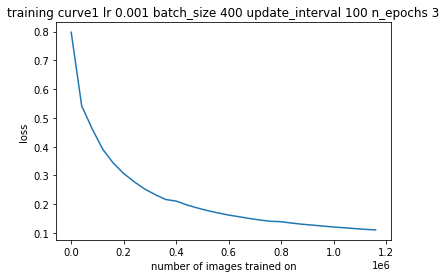

In [ ]:
# Training Model 1

trained_model1, losses1 = training('model1',model1, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

plt.plot(np.arange(len(losses1)) * batch_size * update_interval, losses1)
plt.title("training curve1 lr {} batch_size {} update_interval {} n_epochs {}".format(lr,batch_size,update_interval,n_epochs))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
# Testing Model1
test_acc,test_loss = testing('model1', trained_model1, loss_function, test_dataloader)
plt.savefig("CNN Model1 Imbalanced lables test_acc {} test_loss ={}.png".format(test_acc,test_loss))

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

test accuracy: 98.29
test loss: 0.05


<Figure size 432x288 with 0 Axes>

In [ ]:
# lr = 0.001      # The size of the step taken when doing gradient descent
# batch_size = 400 # The number of images being trained on at once
# update_interval = 400   # The number of batches trained on before recording loss
# n_epochs = 3         # The number of times we train through the entire dataset
# test accuracy: 97.54
# test loss: 0.07
lr = 0.001           # The size of the step taken when doing gradient descent
batch_size = 400       # The number of images being trained on at once
update_interval = 400   # The number of batches trained on before recording loss
n_epochs = 3        # The number of times we train through the entire dataset

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
loss_function = nn.CrossEntropyLoss()
model2 = MyMLP(784, 2)
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)


100%|██████████| 150/150 [00:09<00:00, 15.69it/s]


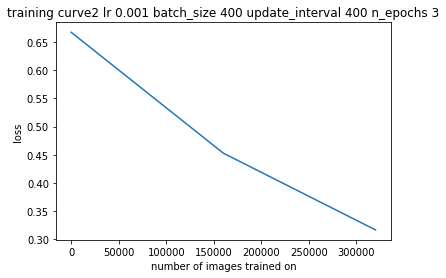

In [ ]:
# # Training Model 2

trained_model2, losses2 = training('model2',model2, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

plt.plot(np.arange(len(losses2)) * batch_size * update_interval, losses2)
plt.title("training curve2 lr {} batch_size {} update_interval {} n_epochs {}".format(lr,batch_size,update_interval,n_epochs))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
# Testing Model2
test_acc,test_loss = testing('model2', trained_model2, loss_function, test_dataloader)
plt.savefig("CNN Model2 Imbalanced lables test_acc {} test_loss ={}.png".format(test_acc,test_loss))

100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

test accuracy: 95.99
test loss: 0.11


<Figure size 432x288 with 0 Axes>

In [ ]:
# best_lr,best_batch_size, best_n_epochs,loss, best_model2 = grid_search(model2, 784, 2, test_dataset)
# print(best_lr,best_batch_size, best_n_epochs, loss)

In [ ]:
lr = 0.001    # The size of the step taken when doing gradient descent
batch_size = 500 # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 3       # The number of times we train through the entire dataset
# test accuracy: 97.95
# test loss: 0.06

# lr = 0.00129           # The size of the step taken when doing gradient descent
# batch_size = 800       # The number of images being trained on at once
# update_interval = 100   # The number of batches trained on before recording loss
# n_epochs = 3        # The number of times we train through the entire dataset
# test accuracy: 59.72
# test loss: 0.33
train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
test_dataset, test_dataloader = load_mnist(batch_size = batch_size, train = False)
loss_function = nn.CrossEntropyLoss()
model3 = MyMLP(784, 2)
optimizer = torch.optim.Adam(model3.parameters(), lr = lr)


100%|██████████| 120/120 [00:10<00:00, 11.33it/s]


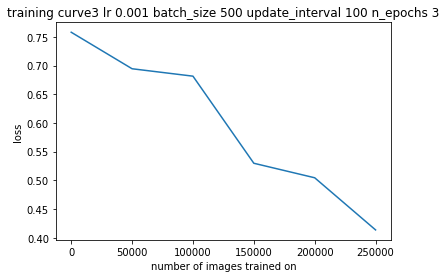

In [ ]:
# Training Model 3
trained_model3, losses3 = training('model3',model3, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

plt.plot(np.arange(len(losses3)) * batch_size * update_interval, losses3)
plt.title("training curve3 lr {} batch_size {} update_interval {} n_epochs {}".format(lr,batch_size,update_interval,n_epochs))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()

In [ ]:
# Testing Model3
test_acc,test_loss = testing('model3', trained_model3, loss_function, test_dataloader)
plt.savefig("CNN Model3 Imbalanced lables test_acc {} test_loss ={}.png".format(test_acc,test_loss))

100%|██████████| 20/20 [00:01<00:00, 17.59it/s]

test accuracy: 94.5
test loss: 0.15


<Figure size 432x288 with 0 Axes>

In [ ]:
lr = 0.00129           # The size of the step taken when doing gradient descent
batch_size = 800       # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 3        # The number of times we train through the entire dataset
train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
model4 = MyMLP(784, 2)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=lr)

100%|██████████| 75/75 [00:09<00:00,  7.95it/s]


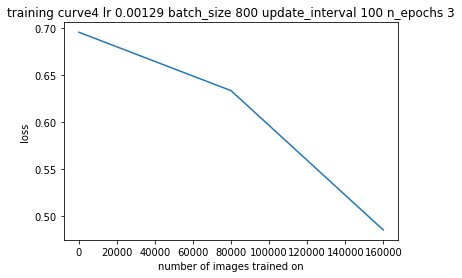

In [ ]:
#  Training Model 4
trained_model4, losses4 = training('model4',model4, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
plt.plot(np.arange(len(losses4)) * batch_size * update_interval, losses4)
plt.title("training curve4 lr {} batch_size {} update_interval {} n_epochs {}".format(lr,batch_size,update_interval,n_epochs))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
# Testing Model4
test_acc,test_loss = testing('model4', trained_model4, loss_function, test_dataloader)
plt.savefig("CNN Model4 Imbalanced lables test_acc {} test_loss ={}.png".format(test_acc,test_loss))

100%|██████████| 20/20 [00:01<00:00, 17.75it/s]

test accuracy: 94.81
test loss: 0.14


<Figure size 432x288 with 0 Axes>

In [ ]:
def train_and_test(modelname,model, loss_function, optimizer, batch_size, update_interval, n_epochs):

    '''
    This will use your/my methods to create a dataloader, train a gven model, and then test its performance

    Again, since I gave this to you for free you have to promise to look at it and try to understand it
    '''

    _, train_dataloader = load_mnist(batch_size=batch_size, train=True)
    trained_model, losses = training(modelname,model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

    # Specify a path
    PATH = "state_dict_{}.pt".format(modelname)

    # Save
    torch.save(trained_model.state_dict(), PATH)
    _, test_dataloader = load_mnist(batch_size=10000, train=False)
    test_acc, test_loss = testing(modelname, trained_model, loss_function, test_dataloader)

    plt.plot(np.arange(len(losses)) * batch_size * update_interval, losses, color="b", label="train loss")
    plt.hlines(test_loss, 0, len(losses) * batch_size * update_interval, color='r', label="test loss")
    plt.legend()
    plt.title("training curve")
    plt.xlabel("number of images trained on")
    plt.ylabel("loss")
    plt.savefig('lr{} Single Model test_acc{} test_loss{}.png'.format(0.08,test_acc,test_loss))
    plt.show()

    return trained_model, test_loss



100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


test accuracy: 96.9
test loss: 0.1


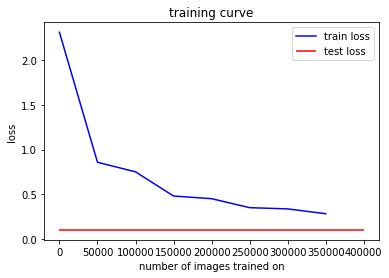

In [ ]:
# Getting Train and Test for the BASELINE Model
lr = 0.01               # The size of the step taken when doing gradient descent
batch_size = 500     # The number of images being trained on at once
update_interval = 100      # The number of times we train through the entire dataset
model = MyMLP(784, 10)
n_epochs = 4
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

_, _ = train_and_test('model',model, loss_function, optimizer, batch_size=batch_size, update_interval=update_interval, n_epochs=n_epochs)

In [ ]:
#  Change the labels
# Have 4 modules : if module 1 : change the label to 0 if it is in say group [2,3,4,5,6] , if not make it output a 1
# Create 4 modules like this
# And Map each output 0 and 1 for each module to a unique number
# {9 : 1111}

In [ ]:
# Train 1 model to predict 4 different ways
# Recurrent Predictions into Groups :
# Group 1 : [0 -5][5-9]
# Say the model selects [5-9]
# Now make the model predict [5-7] and [8-9] as groups
#  keep splitting things until you get 1 prediciton  == label

In [ ]:
def final_testing(train_dataloader, n_epochs, update_interval):
    acc = []
    part_loss = []
    num_correct = 0
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):
            out1 = trained_model1(image)
            out2 = trained_model2(image)
            out3 = trained_model3(image)
            out4 = trained_model4(image)
            res = []
            for i in range(len(out1)):
                a = str(torch.argmax(out1[i]).numpy()) + str(torch.argmax(out2[i]).numpy()) + str(torch.argmax(out3[i]).numpy()) + str(torch.argmax(out4[i]).numpy())
                res.append(int(a))
            my_output = res
            new_label = torch.Tensor([int(mapping[int(l)]) for l in label]).long()
            num_correct = 0
            # print(new_label)
            for index in range(len(new_label)):
                if my_output[index] == new_label[index] :
                    num_correct = num_correct + 1

            acc.append(num_correct/len(new_label))
            ##############################################################
    return acc

100%|██████████| 120/120 [00:19<00:00,  6.06it/s]


final accuracy tensor(0.8718)


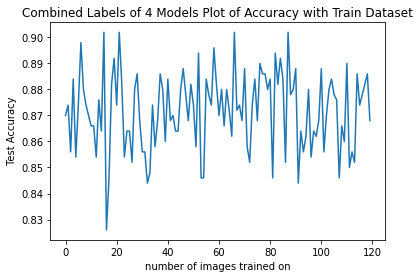

In [ ]:
_, train_dataloader = load_mnist(batch_size=batch_size, train=True)
acc = final_testing(train_dataloader, 1, 300)
plt.plot(acc)
plt.title("Combined Labels of 4 Models Plot of Accuracy with Train Dataset")
plt.xlabel("number of images trained on")
plt.ylabel(" Test Accuracy")
final_accuracy = torch.tensor(acc).mean()
print("final accuracy" ,final_accuracy)
plt.savefig("CNN Training Data Combined Model Accuracy Plot Imbalanced Labelling Final Accuracy {}.png".format(final_accuracy))

100%|██████████| 20/20 [00:04<00:00,  4.48it/s]


final accuracy tensor(0.8681)


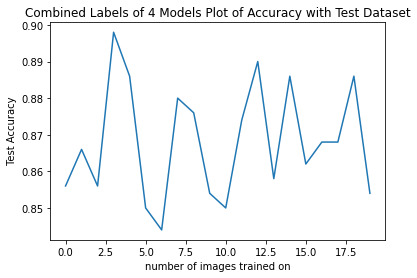

In [ ]:
# Testing on Test Dataset
_, test_dataloader = load_mnist(batch_size=batch_size, train=False)
acc = final_testing(test_dataloader, 1, 300)
plt.plot(acc)
plt.title("Combined Labels of 4 Models Plot of Accuracy with Test Dataset")
plt.xlabel("number of images trained on")
plt.ylabel(" Test Accuracy")
final_accuracy = torch.tensor(acc).sum()/len(acc)
print("final accuracy" ,final_accuracy)
plt.savefig("CNN Testing Data Combined Model Accuracy Plot Imbalanced Labelling Final Accuracy {}.png".format(final_accuracy))


In [ ]:
#   Balanced Data (Li and etc) vs Our Binary mapping right now
#   no of epochs should be less
#  Testing Accuracy , Learning Curve
#  Also how will the model perform if given 1000  Exampls, vs 6000 Examples etc .
# Compare this to the baseline model

# Train 4 models indvidually
# Just test the model with combination of outputs of 4 models(no training required, just combine the outputs)

In [ ]:
# The model Capability may not be enough : Try the Same with ResNets
print("testing the previously trained model on test dataset of MNIST")
test_dataset, test_dataloader = load_mnist(batch_size=10000, train=False)


testing the previously trained model on test dataset of MNIST


In [ ]:
#  Group similar numbers together and test it out
balancedMap = {0: '0000',1 :'0001',2 : '0011', 3:'0101', 4:'0111',5:'1000',6:'1010',7:'1100',8:'1110', 9:'1111'}
invBalancedMap = {'0000' : 0,'0001': 1,'0011' : 2, '0101' : 3, '0111': 4, '1000' :5,'1010': 6,'1100' :7,'1110' : 8, '1111' :9,'0110':10,'0010':11, '0100':12,'1001':13, '1101':14,'1011':15  }
lessOverlapMap = {0: '0010', 1: '0011', 2: '0100', 3: '0101', 4:'0110', 5:'1001', 6:'1010', 7:'1011', 8:'1100', 9:'1101'}

In [ ]:
def balanced_training(modelname,model, loss_function, optimizer, train_dataloader, n_epochs, update_interval,Map):

    '''
    Updates the parameters of the given model using the optimizer of choice to
    reduce the given loss_function

    This will iterate over the dataloader 'n_epochs' times training on each batch of images

    To get the gradient (which is stored internally in the model) use .backward() from the loss tensor
    and to apply it use .step() on the optimizer

    In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this
    '''

    losses = []
    part_loss = []
    sum_loss = 0
    n_correct = 0
    total = 0
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):
            optimizer.zero_grad()
            pred = model(image)
            if modelname == 'model1':
                new_label = torch.Tensor([int(Map[int(l)][0]) for l in label]).long()
            elif modelname == 'model2':
                new_label = torch.Tensor([int(Map[int(l)][1]) for l in label]).long()
            elif modelname == 'model3':
                new_label = torch.Tensor([int(Map[int(l)][2]) for l in label]).long()
            elif modelname == 'model4':
                new_label = torch.Tensor([int(Map[int(l)][3]) for l in label]).long()
            elif modelname == 'model':
                new_label = label
            loss = loss_function(pred,new_label)
            loss.backward()
            optimizer.step()
            part_loss.append(loss.item())

            if i % update_interval == 0:
                losses.append(sum(part_loss)/len(part_loss)) # This will append your losses for plotting -- please use "loss" as the name for your loss
            sum_loss += loss.item()
            _, predicted = torch.max(pred,1)
            n_correct += (predicted == new_label).sum()
            total += new_label.size(0)

            test_acc = round(((n_correct / total).item() * 100), 2)
            avg_loss = round(sum_loss / len(train_dataloader), 2)

    print("train accuracy:", test_acc)
    print("train loss:", avg_loss )

    return model, losses
# Training accuracy is found after testing on the train dataset.

In [ ]:
def balanced_testing(modelname, model, loss_function, test_data,Map):
    sum_loss = 0
    n_correct = 0
    total = 0
    for i, (image, label) in enumerate(tqdm(iter(test_data))):
        pred = model(image)
        if modelname == 'model1':
            new_label =  torch.Tensor([int(Map[int(l)][0]) for l in label]).long()
        elif modelname == 'model2':
            new_label = torch.Tensor([int(Map[int(l)][1]) for l in label]).long()
        elif modelname == 'model3':
            new_label = torch.Tensor([int(Map[int(l)][2]) for l in label]).long()
        elif modelname == 'model4':
            new_label = torch.Tensor([int(Map[int(l)][3]) for l in label]).long()
        elif modelname == 'model':
            new_label = label
        loss = loss_function(pred,new_label)
        sum_loss += loss.item()
        _, predicted = torch.max(pred,1)
        n_correct += (predicted == new_label).sum()
        total += new_label.size(0)

    test_acc = round(((n_correct / total).item() * 100), 2)
    avg_loss = round(sum_loss / len(test_data), 2)

    print("test accuracy:", test_acc)
    print("test loss:", avg_loss )

    return test_acc, avg_loss

In [ ]:
# Plug in your model, loss function, and optimizer
# Try out different hyperparameters and different models to see how they perform

lr = 0.005         # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 500        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 2        # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model1 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model1.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 120/120 [00:14<00:00,  8.18it/s]


train accuracy: 91.16
train loss: 0.43


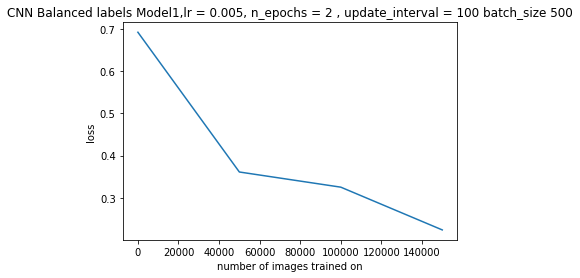

In [ ]:
#  Training Balanced Model1
balanced_trained_model1, balanced_losses1 = balanced_training('model1',balanced_model1, loss_function, optimizer, train_dataloader, n_epochs=n_epochs,update_interval = update_interval,Map = balancedMap)
plt.plot(np.arange(len(balanced_losses1)) * batch_size * update_interval, balanced_losses1)
plt.title("CNN Balanced labels Model1,lr = {}, n_epochs = {} , update_interval = {} batch_size {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()

In [ ]:
# Testing Balanced Model1
balanced_test_acc_1,balanced_test_loss_1 = balanced_testing('model1', balanced_trained_model1, loss_function, test_dataloader,balancedMap)
plt.savefig("CNN balanced labels Model1,test_acc = {},test_avg_loss = {}.png".format(balanced_test_acc_1,balanced_test_loss_1))

100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

test accuracy: 96.86
test loss: 0.09


<Figure size 432x288 with 0 Axes>

In [ ]:
lr = 0.008         # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 500        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 1       # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model2 = MyMLP(784, 2)
optimizer = torch.optim.RMSprop(balanced_model2.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()
# Try MSE Loss


100%|██████████| 120/120 [00:11<00:00, 10.09it/s]

train accuracy: 50.02
train loss: 0.7


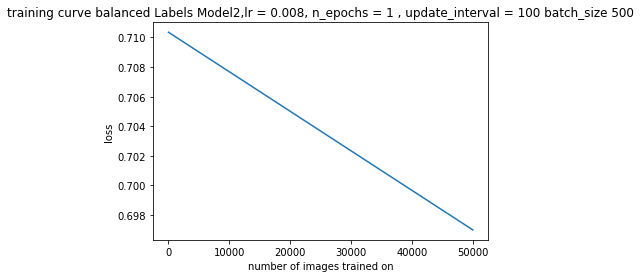

In [ ]:
#  Training Balanced Model2
balanced_trained_model2, balanced_losses2 = balanced_training('model2',balanced_model2, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval,Map = balancedMap)
plt.plot(np.arange(len(balanced_losses2)) * batch_size * update_interval, balanced_losses2)
plt.title("training curve balanced Labels Model2,lr = {}, n_epochs = {} , update_interval = {} batch_size {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
balanced_test_acc_2,balanced_test_loss_2 = balanced_testing('model2', balanced_trained_model2, loss_function, test_dataloader,balancedMap)
plt.savefig("CNN Balanced Model2 Training Curve test_acc {},test_loss {}.png".format(balanced_test_acc_2, balanced_test_loss_2))

100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

test accuracy: 49.97
test loss: 0.69


<Figure size 432x288 with 0 Axes>

In [ ]:
lr = 0.006          # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 600        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 3          # The number of times we train through the entire dataset 5 10 15
train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model3 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model3.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 100/100 [00:09<00:00, 10.75it/s]


train accuracy: 92.49
train loss: 0.57


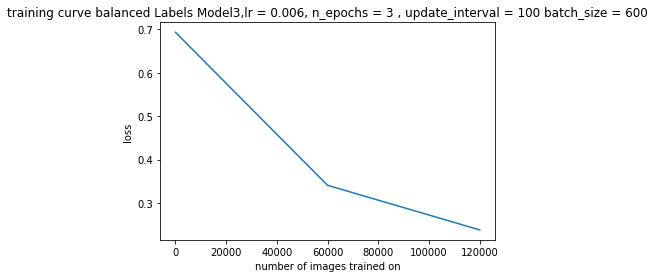

In [ ]:
#  Training Balanced Model3
balanced_trained_model3, balanced_losses3 = balanced_training('model3',balanced_model3, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval,Map = balancedMap)
plt.plot(np.arange(len(balanced_losses3)) * batch_size * update_interval, balanced_losses3)
plt.title("training curve balanced Labels Model3,lr = {}, n_epochs = {} , update_interval = {} batch_size = {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
# Testing Balanced Model3
balanced_test_acc_3,balanced_test_loss_3 = balanced_testing('model3', balanced_trained_model3, loss_function, test_dataloader,balancedMap)
plt.savefig("CNN Balanced Model3 Training Curve test_acc {} test_loss = {}.png".format(balanced_test_loss_3, balanced_test_acc_3))

100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

test accuracy: 97.37
test loss: 0.07


<Figure size 432x288 with 0 Axes>

In [ ]:
lr = 0.005          # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 600        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 5          # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model4 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model4.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 100/100 [00:09<00:00, 10.81it/s]


train accuracy: 93.46
train loss: 0.75


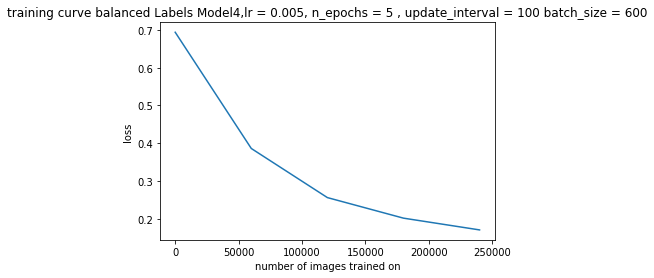

In [ ]:
#  Training Balanced Model4
balanced_trained_model4, balanced_losses4 = balanced_training('model4',balanced_model4, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval,Map = balancedMap)
plt.plot(np.arange(len(balanced_losses4)) * batch_size * update_interval, balanced_losses4)
plt.title("training curve balanced Labels Model4,lr = {}, n_epochs = {} , update_interval = {} batch_size = {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
# Testing Balanced Model4
balanced_test_acc_4, balanced_test_loss_4= balanced_testing('model4', balanced_trained_model4, loss_function, test_dataloader,balancedMap)
plt.savefig("CNN Balanced Model4 Training Curve test_acc = {}, test_loss = {}.png".format(balanced_test_acc_4, balanced_test_loss_4))

100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

test accuracy: 97.78
test loss: 0.06


<Figure size 432x288 with 0 Axes>

In [ ]:
def balanced_final_testing(train_dataloader, n_epochs, update_interval):
    acc = []
    part_loss = []
    num_correct = 0
    y_test = []
    y_pred = []
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):
            # Hint: the above code essentially does one training step
            ##############################################################
            out1 = balanced_trained_model1(image)
            out2 = balanced_trained_model2(image)
            out3 = balanced_trained_model3(image)
            out4 = balanced_trained_model4(image)
            res = []
            a = ""
            for i in range(len(out1)):
                a = str(torch.argmax(out1[i]).numpy()) + str(torch.argmax(out2[i]).numpy()) + str(torch.argmax(out3[i]).numpy()) + str(torch.argmax(out4[i]).numpy())
                if a in invBalancedMap:
                    y_pred.append(invBalancedMap[a])

                else:
                    y_pred.append(-1)
                res.append(int(a))

            my_output = res
            for l in label:
                y_test.append(l.item())
            new_label = torch.Tensor([int(balancedMap[int(l)]) for l in label]).long()
            num_correct = 0
            for index in range(len(new_label)):
                if my_output[index] == new_label[index] :
                    num_correct = num_correct + 1
            acc.append(num_correct/len(new_label))

    return acc,y_test,y_pred

In [ ]:
# Split Classes based on Similar numbers


100%|██████████| 100/100 [00:16<00:00,  6.15it/s]


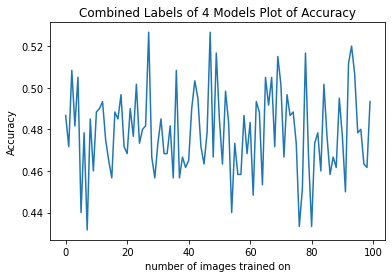

<Figure size 432x288 with 0 Axes>

In [ ]:
_, train_dataloader = load_mnist(batch_size=batch_size, train=True)
acc,y_test, y_pred = balanced_final_testing(train_dataloader, 1, 300)
plt.plot(acc)
plt.title("Combined Labels of 4 Models Plot of Accuracy")
plt.xlabel("number of images trained on")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("CNN Train Combined Model Accuracy Plot Balanced Labels.png")


In [ ]:
# print(y_test,"y_test")
print(len(y_test))


60000


In [ ]:
# print(y_pred,"y_pred")
print(len(y_pred))

60000


In [ ]:
torch_acc = torch.tensor(acc)
print(torch_acc.mean())


tensor(0.4788)


100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


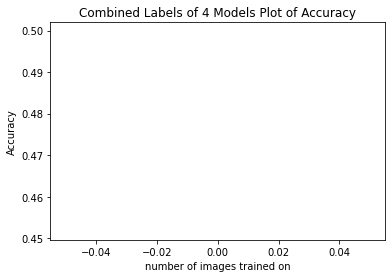

<Figure size 432x288 with 0 Axes>

In [ ]:
acc,y_test, y_pred  = balanced_final_testing(test_dataloader, 1, 300)
plt.plot(acc)
plt.title("Combined Labels of 4 Models Plot of Accuracy")
plt.xlabel("number of images trained on")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("CNN Test Combined Model Accuracy Plot Balanced Labels.png")


In [ ]:
torch_acc = torch.tensor(acc)
print(torch_acc.mean())


tensor(0.4758)


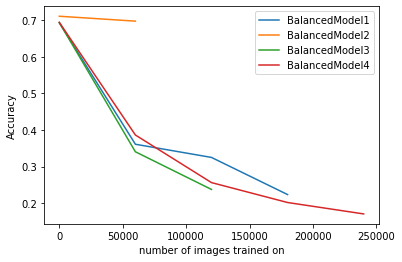

In [ ]:
# Plot Combined Training of all 4 Balanced models
# plot lines
# plt.sub
plt.plot(np.arange(len(balanced_losses1)) * batch_size * update_interval, balanced_losses1, label = 'BalancedModel1')
plt.plot(np.arange(len(balanced_losses2)) * batch_size * update_interval, balanced_losses2,label ='BalancedModel2')
plt.plot(np.arange(len(balanced_losses3)) * batch_size * update_interval, balanced_losses3,label = 'BalancedModel3')
plt.plot(np.arange(len(balanced_losses4)) * batch_size * update_interval, balanced_losses4,label = 'BalancedModel4')
plt.xlabel("number of images trained on")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Plot Combined Training of all 4 unbalanced models


In [ ]:
# Average over mutlitple runs and find the loss ; show the task for each and test permutations of tasks (different subtasks)
# Find the confusion matrix for the matrix inference : y : real label, x : predicted output, diagnals are the right answers.
#
print(len(y_test))
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# conf_mat = confusion_matrix(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
# sn.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt="d", cbar=False)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.show()
plt.savefig("Confusion Matrix on Balanced Dataset.jpg")

10000


ValueError: ignored

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sn.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt="d", cbar=False)

100%|██████████| 100/100 [00:15<00:00,  6.54it/s]


train accuracy: 97.22
train loss: 0.41


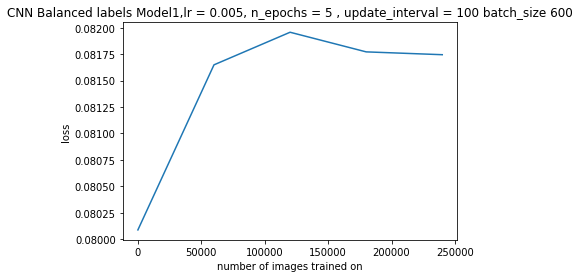

In [ ]:
#train less overlap model1
#  Training Balanced Model1
balanced_trained_model1, balanced_losses1 = balanced_training('model1',balanced_model1, loss_function, optimizer, train_dataloader, n_epochs=n_epochs,update_interval = update_interval,Map = lessOverlapMap)
plt.plot(np.arange(len(balanced_losses1)) * batch_size * update_interval, balanced_losses1)
plt.title("CNN Balanced labels Model1,lr = {}, n_epochs = {} , update_interval = {} batch_size {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()

In [ ]:
# Testing Balanced Model1
balanced_test_acc_1,balanced_test_loss_1 = balanced_testing('model1', balanced_trained_model1, loss_function, test_dataloader,balancedMap)
plt.savefig("CNN balanced labels Model1,test_acc = {},test_avg_loss = {}.png".format(balanced_test_acc_1,balanced_test_loss_1))

100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

test accuracy: 96.86
test loss: 0.09


<Figure size 432x288 with 0 Axes>